In [21]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("anthony-wss/noisy-uniform-cifar")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

In [22]:
df = pd.json_normalize([summary_list[i] | config_list[i] for i in range(len(summary_list))], sep='_')
df.columns

Index(['train_acc', 'valid_acc', '_timestamp', 'ure', 'scel', '_runtime',
       '_step', 'test_acc', 'training_loss', 'lr', 'eta', 'algo', 'seed',
       'model', 'data_aug', 'dataset_name', 'data_cleaning_rate',
       'best_epoch-scel_ure', 'best_epoch-scel_scel', 'best_epoch-scel_epoch',
       'best_epoch-scel_test_acc', 'best_epoch-scel_train_acc',
       'best_epoch-scel_valid_acc', 'best_epoch-scel_training_loss',
       '_wandb_runtime', 'best_epoch-valid_acc_ure',
       'best_epoch-valid_acc_scel', 'best_epoch-valid_acc_epoch',
       'best_epoch-valid_acc_test_acc', 'best_epoch-valid_acc_train_acc',
       'best_epoch-valid_acc_valid_acc', 'best_epoch-valid_acc_training_loss',
       'best_epoch-ure_valid_acc', 'best_epoch-ure_training_loss',
       'best_epoch-ure_ure', 'best_epoch-ure_scel', 'best_epoch-ure_epoch',
       'best_epoch-ure_test_acc', 'best_epoch-ure_train_acc'],
      dtype='object')

In [23]:
import pandas as pd

for eta in [0, 0.0125, 0.025, 0.0375, 0.05]:
    print("eta", eta)
    for algo in ['fwd-u', 'fwd-r']:
        sub_df = df.loc[(df['algo'] == algo) & (df['eta'] == eta)]
        
        print(
            algo, 
            eta,
            sub_df.sort_values('valid_acc', ascending=False).iloc[0]['test_acc'],
            sub_df.sort_values('best_epoch-valid_acc_valid_acc', ascending=False).iloc[0]['best_epoch-valid_acc_test_acc']
        )

eta 0
fwd-u 0 0.6693 0.6707
fwd-r 0 0.6489 0.6791
eta 0.0125
fwd-u 0.0125 0.5642 0.5683
fwd-r 0.0125 0.5685 0.5845
eta 0.025
fwd-u 0.025 0.4664 0.4619
fwd-r 0.025 0.4494 0.4693
eta 0.0375
fwd-u 0.0375 0.3807 0.3807
fwd-r 0.0375 0.3496 0.3912
eta 0.05
fwd-u 0.05 0.2821 0.292
fwd-r 0.05 0.2906 0.3203


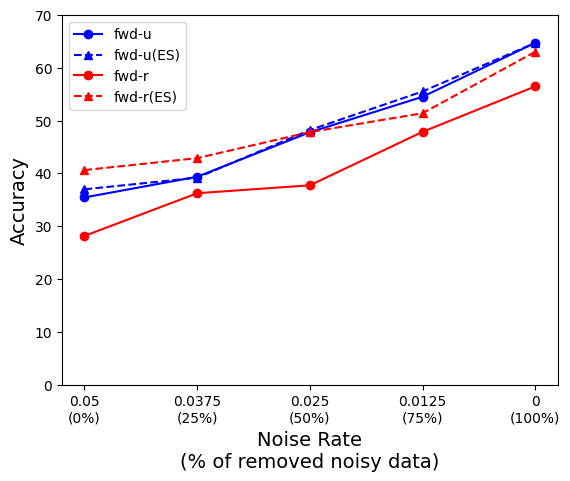

In [19]:
import matplotlib.pyplot as plt

# Define the data
fwd_u = [35.43, 39.35, 47.78, 54.5, 64.72]
fwd_u_es = [36.97, 39.17, 48.2, 55.51, 64.72]
fwd_r = [28.14, 36.23, 37.73, 47.86, 56.47]
fwd_r_es = [40.61, 42.88, 47.81, 51.39, 63.03]

uniform_clcifar10_fwd = 48.44

# Create the plot
fig, ax = plt.subplots()
ax.plot(fwd_u, linestyle='solid', marker='o', color='blue', label='fwd-u')
ax.plot(fwd_u_es, linestyle='--', marker='^', color='blue', label='fwd-u(ES)')
ax.plot(fwd_r, linestyle='solid', marker='o', color='red', label='fwd-r')
ax.plot(fwd_r_es, linestyle='--', marker='^', color='red', label='fwd-r(ES)')
# ax.axhline(y=uniform_clcifar10_fwd, color='tomato', label='uniform CL')

xticks = ["0.05\n(0%)", "0.0375\n(25%)", "0.025\n(50%)", "0.0125\n(75%)", "0\n(100%)"]
# ax.fill_between(xticks, fwd_u, fwd_u_es, where=fwd_u_es>=fwd_u, interpolate=True, color='gray', alpha=0.3)
# ax.fill_between(xticks, y1, y2, where=y2<y1, interpolate=True, color='green', alpha=0.3)

# Add labels and legend
ax.set_xlabel('Noise Rate\n(% of removed noisy data)', fontsize=14)

ax.set_xticks(range(len(fwd_u)))
ax.set_xticklabels(xticks)

yticks = list(range(0, 71, 10))
ax.set_yticks(yticks)

ax.set_ylabel('Accuracy', fontsize=14)
ax.legend()

plt.savefig("./noise-cleaning-fwd-clcifar10.png")
plt.show()

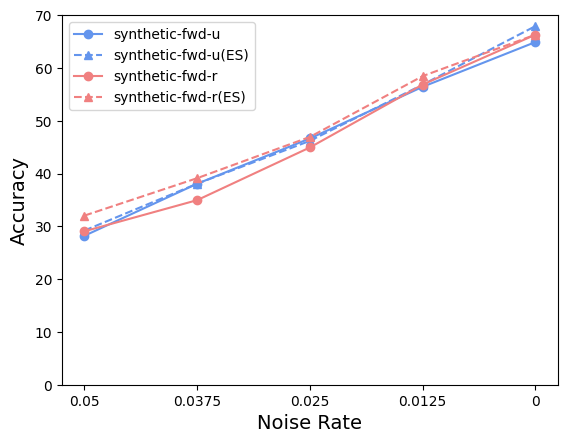

In [24]:
import matplotlib.pyplot as plt

# Define the data
n_fwd_u = [28.21, 38.07, 46.64, 56.42, 64.89]
n_fwd_u_es = [29.2, 38.07, 46.19, 56.83, 67.91]
n_fwd_r = [29.06, 34.96, 44.94, 56.85, 66.29]
n_fwd_r_es = [32.03, 39.12, 46.93, 58.45, 66.29]

uniform_clcifar10_fwd = 48.44

# Create the plot
fig, ax = plt.subplots()
ax.plot(n_fwd_u, linestyle='solid', marker='o', color='cornflowerblue', label='synthetic-fwd-u')
ax.plot(n_fwd_u_es, linestyle='--', marker='^', color='cornflowerblue', label='synthetic-fwd-u(ES)')
ax.plot(n_fwd_r, linestyle='solid', marker='o', color='lightcoral', label='synthetic-fwd-r')
ax.plot(n_fwd_r_es, linestyle='--', marker='^', color='lightcoral', label='synthetic-fwd-r(ES)')
# ax.axhline(y=uniform_clcifar10_fwd, color='tomato', label='uniform CL')

xticks = [0.05, 0.0375, 0.025, 0.0125, 0]
# ax.fill_between(xticks, fwd_u, fwd_u_es, where=fwd_u_es>=fwd_u, interpolate=True, color='gray', alpha=0.3)
# ax.fill_between(xticks, y1, y2, where=y2<y1, interpolate=True, color='green', alpha=0.3)

# Add labels and legend
ax.set_xlabel('Noise Rate', fontsize=14)

ax.set_xticks(range(len(fwd_u)))
ax.set_xticklabels(xticks)

yticks = list(range(0, 71, 10))
ax.set_yticks(yticks)

ax.set_ylabel('Accuracy', fontsize=14)
ax.legend()

plt.savefig("./noise-cleaning-fwd-uniform-cifar10.png")
plt.show()